<h3>1.- Dibujar el diagrama de bifurcaciones del mapeo logístico</h3>

In [1]:
#Importamos algunas librerias de utilidad
import numpy as np
from enum import Enum
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from IPython.display import clear_output

Como recordatorio, la relación de recurrencia del mapeo logístico es la siguiente:

$$x_{n+1} = ax_{n}(1-x_{n}) \quad a\in [0,4], x\in[0,1]$$

Se implementará una clase LogisticMap, la cual encapsule todos los métodos necesarios para dibujar el diagrama de bifurcaciones.

In [113]:
class LogisticMap:
    
    def __init__(self, initialCondition, a, steps):
        #Inicializamos el mapeo con el parametro a 
        self.a = a
        self.initialCondition = initialCondition
        self.steps = steps
        self.offset = self.steps - int(self.steps/4)
        self.tolerance = 10**(-5)

    #Función para realizar un paso de la recursión
    def step(self, x0):
        x = self.a*x0*(1-x0)
        return x
    
    #Esta función obtiene la evolución del sistema
    def evolve(self):
        xArray =  []
        x = self.initialCondition
        xArray.append(x)
        for i in range(0, self.steps):
            newX = self.step(x)
            xArray.append(newX)
            x = newX
            
        return xArray
    
    #Regresa la periodicidad y la orbita
    def getAttractor(self):
        xArray = self.evolve()
        completeN = len(xArray)
        periodArray = xArray[completeN - self.offset: completeN]
        #Vamos a obtener la periodicidad. 
        k = 0
        n = len(periodArray)
        x0 = periodArray[n-1]
        for i in range(1, n-1):
            k = k+1
            x = periodArray[n-i-1]
            if(np.abs(x-x0) < self.tolerance):
                break
        
        return k, periodArray[n-k: n]
    
    #Dibuja el diagrama de bifurcaciones
    def plotPeriodDoubling(self):
        #Hacemos un arreglo de parametros
        aArray = np.linspace(0,4,10000)
        self.steps = 1000
        #Para cada uno de los valores de parámetros vamos a
        #obtener los puntos de atraccion y g
        xArr = []
        yArr = []
        for i in range(0, len(aArray)):
            self.a = aArray[i]
            k, periodArray = self.getAttractor()
            for j in range(0,len(periodArray)):
                xArr.append(self.a)
                yArr.append(periodArray[j])
        plt.title("Ruta al caos por doblamiento del periodo")
        plt.xlabel("a")
        plt.ylabel("Puntos límite")
        plt.plot(xArr, yArr, marker = '.',color = "#42bcf5",markersize =0.05, linewidth = 0)
        plt.xlim([2.6,4])
    
    
    #Obtiene en forma aproximada los puntos en los que 
    #se lleva a cabo la bifurcación
    def getBifurcationPoints(self):
        bifurcationPoints = []
        bifurcationPoints.append(1)
        period = 1
        chaos = False
        i = 0
        cap = 512
        self.a = 3
        delta = 1*10**(-6)
        maxResolution = 1*10**(-20)
        while(not chaos):
            self.a = self.a + delta
            clear_output(wait = True)
            print(self.a,flush = True)
            print(period)
            k,periodArray = self.getAttractor()
            if(period != k):
                #Raise resolution
                if(k > 2*period and k != self.steps and  period!= 0):
                    print("k" +str(k))
                    print("a " + str(self.a))
                    n = len(bifurcationPoints)
                    print("refining, new delta: " + str(delta/10))
                    self.a = self.a-delta
                    delta = delta/10
                    i = 0
                    if(delta < maxResolution):
                        print(delta)
                        chaos = True
                elif(k == self.steps):
                    print("chaos")
                    chaos = True
                elif(k == 2*period):
                    print("added point, new period "+str(k))
                    period = k
                    bifurcationPoints.append(self.a)
                    if(k >= cap):
                        print("cap reached")
                        chaos = True
            i+=1
        
        return bifurcationPoints
    
    #Quiero hacer una animación de la evolución de un sistema. 
    def plotCurrentEvolution(self, i):
        #Limpiamos el frame
        self.ax.clear()
        self.ax.set_title("Mapa logístico animación")
        self.ax.set_ylim([0,1])
        self.ax.set_xlim([0,1])
        #Graficamos la parábola
        plt.plot(self.x, self.yParabola)
        #Graficamos la linea
        plt.plot(self.x, self.yLine)
        xArr = []
        yArr = []
        for i in range(0, i-1):
            if(i == 0):
                xArr.append(self.solution[i])
                yArr.append(0)
                xArr.append(self.solution[i])
                yArr.append(self.solution[i+1])
                xArr.append(self.solution[i+1])
                yArr.append(self.solution[i+1])
            else:
                xArr.append(self.solution[i])
                yArr.append(self.solution[i+1])
                xArr.append(self.solution[i+1])
                yArr.append(self.solution[i+1])    
        plt.plot(xArr, yArr, linestyle = "-", linewidth = 2, color = "#329ba8")
            
        
    #Metodo para generar una animación de la evolución del sistema
    
    def animateEvolution(self):
        self.fig,self.ax = plt.subplots()
        self.x = np.linspace(0,1,1000)
        self.yLine = self.x
        self.yParabola = self.a*self.x*(1-self.x)
        self.solution = self.evolve()
        n = len(self.solution)
        speed = 500
        anim = FuncAnimation(self.fig, self.plotCurrentEvolution, frames = n, interval = speed, blit = False)
        return HTML(anim.to_html5_video())
        
            
    

    

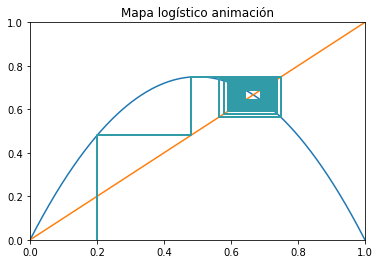

In [114]:
#Prueba de funcionamiento del mapa logístico
initialCondition = 0.2
a = 3
steps = 100
map = LogisticMap(initialCondition, a,steps)
map.animateEvolution()

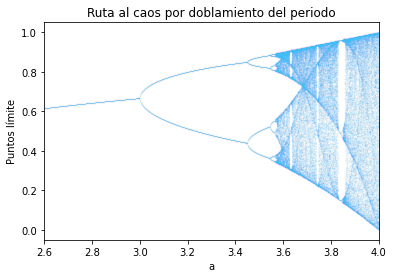

In [115]:
#Prueba de funcionamiento del mapa logístico
initialCondition = 0.4
steps = 100
map = LogisticMap(initialCondition, a,steps)
#k, periodArray = map.getAttractor()
#print(periodArray)
map.plotPeriodDoubling()

<h3>2.- Dibujar el conjunto de mandelbrot</h3>

La relación de recurrencia para el conjunto de Mandelbrot es:

\begin{equation}
z_{n+1} = z_{n}^2 +  C
\end{equation}

In [128]:
#you're a Rorschach Test on fire. You're a day-glo pterodactyl
class MandelbrotSet:
    def __init__(self):
        self.nIterations = 100
        pointsX = 1000
        pointsY = 1000
        xInf = -1.5
        xSup = 1.5
        yInf = -1.5
        ySup = 1.5
        self.xInf = xInf
        self.xSup = xSup
        self.yInf = yInf
        self.ySup = ySup
        xInterval = np.linspace(xInf,xSup,pointsX)
        yInterval = np.linspace(yInf,ySup,pointsY)
        self.cRegion = np.zeros((pointsY, pointsX),dtype = complex)
        
        n = np.size(self.cRegion,0)
        m = np.size(self.cRegion,1)
        
        for i in range(0,n):
            for s in range(0,m):
                self.cRegion[i,s] = complex(xInterval[s], yInterval[i])
        self.xInterval = xInterval
        self.yInterval = yInterval
        
    #En caso de converger se regresa el 
    #maximo numero de iteraciones (lo tomé como una bandera)
    #En caso de diverger se devuelve el número de iteraciones
    #que toma sobrepasar una norma de 2. 
    def getConvergence(self, cValue):
        z = complex(0,0)
        iterations = 0
        znext = 0
        cap = 2
        for i in range(0,self.nIterations):
            iterations += 1
            znext = z**2 + cValue
            if(np.abs(znext)>cap):
                break
            z = znext
        return iterations
    
    #Evalua la convergencia en una gradilla de valores de C
    #Y asigna colores usando coloración por histograma 
    #(vease https://en.wikipedia.org/wiki/Plotting_algorithms_for_the_Mandelbrot_set)
    def computeConvergenceGrid(self):
        n = np.size(self.cRegion,0)
        m = np.size(self.cRegion,1)
        convergenceGrid = np.zeros((n,m),dtype = int)
        grad = np.array([1,1,1]) - np.array([0.04,0,0.5])
        gradNorm = np.sqrt(grad[0]**2 + grad[1]**2 + grad[2]**2)
        gradUnit = grad/gradNorm
        for i in range(0,n):
            for j in range(0,m):
                cValue = self.cRegion[i,j]
                iterations = self.getConvergence(cValue)
                if(iterations != self.nIterations):
                    convergenceGrid[i,j] = int(iterations)
        
        histSize = np.max(convergenceGrid)
        histogram = np.zeros(histSize)
        for i in range(0,n):
            for j in range(0,m):
                index = convergenceGrid[i,j]
                if(index != 0):
                    histogram[index-1] += 1
        #Ya que tenemos el histograma lo normalizamos
        total = sum(histogram)
        histogram = histogram/total
        colorGrid = np.zeros((n,m,3),dtype = int)
        for i in range(0,n):
            for j in range(0,m):
                index = convergenceGrid[i,j]
                if(index != 0):
                    speed = sum(histogram[0:index])
                    colorVector = np.array([0.04,0,0.5])*255 + gradUnit*speed*255
                    colorVector[0] = int(colorVector[0])
                    colorVector[1] = int(colorVector[1])
                    colorVector[2] = int(colorVector[2])
                    colorGrid[i,j] = colorVector
        
        self.convergenceGrid = colorGrid
        return convergenceGrid
    
    #Dibuja el conjunto de mandelbrot calculado
    def plotMandelbrotSet(self):
        fig, ax = plt.subplots(figsize = (10,10))
        ax.set_title("Conjunto de mandelbrot")
        plt.imshow(self.convergenceGrid)
        plt.show()
    
    #Esta función recibe los puntos de bifurcación del mapeo logístico y usando
    #la relación deducida entre este y el conjunto de mandelbrot (vease el problema 4)
    #obtenemos donde estan los puntos de bifurcación en nuestro dibujo y trazamos 
    #lineas rectas ahí.
    def plotMandelbrotSetWithBifurcationPoints(self, logisticBifurcationPoints):
        imageInfX = 0
        imageSupX = np.size(self.convergenceGrid,1)
        imageInfY = 0
        imageSupY = np.size(self.convergenceGrid,0)
        #Usamos la relacion que encontramos entre el conjunto de mandelbrot
        #y el mapa logístico
        points = []
        for i in range(0,len(logisticBifurcationPoints)):
            a = logisticBifurcationPoints[i]
            C = (a/2) - ((a**2)/4)
            points.append(C)
        
        m = imageSupX/(self.xSup - self.xInf)
        b = -m*self.xInf
        
        pointsInScreen = []
        for i in range(0, len(points)):
            p = points[i]
            transformedPoint = m*p+b
            pointsInScreen.append(transformedPoint)
        
        fig, ax = plt.subplots(figsize = (10,10))
        ax.set_title("Puntos de bifurcación en el conjunto de Mandelbrot")
        plt.imshow(self.convergenceGrid)
        
        for i in range(0,len(pointsInScreen)):
            plt.plot([pointsInScreen[i],pointsInScreen[i]],[imageInfY, imageSupY],color = "#ffce29")
        plt.ylim([imageInfY, imageSupY])
        plt.show()
    
    #Quería hacer una animación que haga zoom al dibujo de mandelbrot
    #Este se muestra mas abajo 
    def plotForAnimation(self,i):
        self.velY = self.velY - self.velY*self.reductionRate
        self.velX = self.velX -self.velX*self.reductionRate
        clear_output(wait = True)
        print(i,flush = True)
        w = self.xSup - self.xInf
        h = self.ySup - self.yInf
        self.xSup = self.velX + self.xSup - w*self.reductionRate
        self.xInf = self.velX + self.xInf + w*self.reductionRate
        self.ySup = self.velY + self.ySup - h*self.reductionRate
        self.yInf = self.velY + self.yInf + h*self.reductionRate
        
        self.cRegion = np.zeros((self.pointsY, self.pointsX),dtype = complex)
        n = np.size(self.cRegion,0)
        m = np.size(self.cRegion,1)
        xInterval = np.linspace(self.xInf,self.xSup,self.pointsX)
        yInterval = np.linspace(self.yInf,self.ySup,self.pointsY)
        for i in range(0,n):
            for j in range(0,m):
                self.cRegion[i,j] = complex(xInterval[j],yInterval[i])
        
        mat = np.zeros((n,m))
        for i in range(0,n):
            for j in range(0,m):
                iterations = self.getConvergence(self.cRegion[i,j])
                if(iterations != self.nIterations):
                    mat[i,j] = iterations
        self.ax.clear()
        self.ax.imshow(mat)
    
    
    #Solo por diversión quisiera hacer una de esas peliculas donde hacen zoom al conjunto da ver si es posible
    def zoomAnimation(self, reductionRate):
        self.reductionRate = reductionRate
        xInf = -1.5
        xSup = 1.5
        yInf = -1.5
        ySup = 1.5
        self.xInf = xInf
        self.xSup = xSup
        self.yInf = yInf
        self.ySup = ySup
        self.velY = 0
        self.velX = -0.02
        self.pointsX = 200
        self.pointsY = 200
        videoSeconds = 30
        fps = 10
        fr = videoSeconds*fps
        self.fig,self.ax = plt.subplots()
        anim = FuncAnimation(self.fig, self.plotForAnimation, frames = fr, interval = (1/fps)*10**3, blit = False)
        
        return HTML(anim.to_html5_video())
    


In [129]:
mandelbrot = MandelbrotSet()

mandelbrot.computeConvergenceGrid()

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

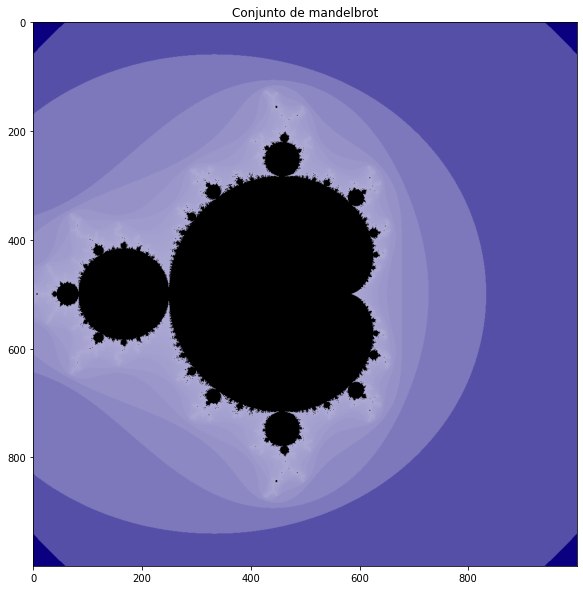

In [130]:
mandelbrot.plotMandelbrotSet()

299


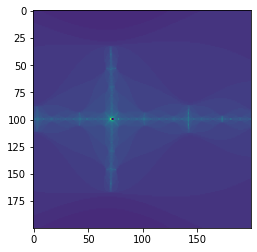

In [131]:
mandelbrot.zoomAnimation(0.01)

<h3>3.- ¿Qué es la constante de Feigenbaum?</h3>

<p>
    Del diagrama de desdoblamiento del periodo que hemos realizado, podemos observar que el tamaño del intervalo entre una bifurcación y la siguiente va disminuyendo. Poniendo esto en terminos un tanto mas precisos, si denotamos a los puntos donde ocurren las bifurcaciones por $a_{0}, a_{1}, a_{2}, \dots a_{k}, \dots$, entonces:
</p>

\begin{equation}
a_{k} - a_{k-1} > a_{k+1} - a_{k}
\end{equation}

<p>
Uno de los descubrimientos mas interesantes que se hicieron cuando se comenzó a estudiar este diagrama fue que conforme $k$ crece, la razón entre las longitudes de intervalos subsecuentes en el diagrama de bifurcación tiende a una constante. En otras palabras para  $k$ grande es posible aproximar:</p>

\begin{equation}
a_{k} - a_{k-1} \approx \delta (a_{k+1}-a_{k})
\end{equation}

<p>Donde $\delta$ es una constante irracional, a la cual se le conoce como constante de Feigenbaum. </p>

<p>En vez de enunciar su valor, creo que sería mas entretenido hallarla en forma computacional. Para ello añadiré una función a la clase Mapa Logístico, la cual me proporcione el valor de $a_{1}, a_{2},$ etc. Con ayuda de este método, el valor de la constante se aproximaría como se muestra en las siguientes celdas. </p>

In [98]:
#Creamos un mapa logístico
initialCondition = 0.4
steps = 10000
map = LogisticMap(initialCondition, a,steps)
#Obtenemos los puntos donde ocurren las bifurcaciones
bifurcationPoints = map.getBifurcationPoints()

3.5699461000796657
256
added point, new period 512
cap reached


In [100]:
#Se aproxima la constante de Feigenbaum con los puntos obtenidos
print(bifurcationPoints)
n = len(bifurcationPoints)
for i in range(1, 6):
    constant = (bifurcationPoints[i] - bifurcationPoints[i-1])/(bifurcationPoints[i+1]-bifurcationPoints[i])
    print(constant)

[1, 3.000001, 3.44921400006279, 3.543999000076039, 3.564382000078888, 3.5687540000794993, 3.5696920000796304, 3.5698920000796583, 3.5699350000796644, 3.5699461000796657]
4.452233127092145
4.739283641926465
4.650198694990924
4.662168344007319
4.660980810234541


<p>En este caso por detalles de precisión de python no fue posible obtener una mejor aproximación de la constante, sin embargo los primeros 2 decimales son correctos. El valor consultado en la literatura para la constante de Feigenbaum es el siguiente:</p>

\begin{equation}
\delta = 4.6694
\end{equation}

<h3>4.- ¿Cual es la relación entre el mapa logístico y el conjunto de mandelbrot?</h3>

<p>Es posible transformar la relación de recursión logística en la de mandelbrot por medio de una manipulación algebraica bastante sencilla. Partimos de: </p>

\begin{align}
&x_{n+1} = ax_{n}(1-x_{n}) \\
\implies &x_{n+1}= a(x_{n} - x_{n}^2)\\
\implies &x_{n+1} = -a(x_{n}^2-x_{n})
\end{align}

<p>Lo que haremos ahora será completar el cuadrado en la parte derecha de la ecuación; Con ello tenemos: </p>

\begin{align}
&x_{n+1} = -a\left(x_{n}^2 - x_{n} + \frac{1}{4} - \frac{1}{4}\right)\\
\implies &x_{n+1} = -a\left(x_{n} -\frac{1}{2}\right)^2 +\frac{a}{4}\\
\implies &x_{n+1} = -a\left(\frac{1}{2} - x_{n}\right)^2 +\frac{a}{4}
\end{align}

Ahora haremos el cambio de variable:

\begin{equation}
z_{n} = a\left(\frac{1}{2} -x_{n}\right)
\end{equation}

Trabajaremos primero en la parte izquierda de nuestra expresión, lo que habría que hacer simplemente es poner a $x_{n+1}$ en terminos de $z_{n+1}$:

\begin{equation}
z_{n+1} = a\left(\frac{1}{2} -x_{n+1}\right) \implies x_{n+1} = -\frac{z_{n+1}}{a} +\frac{1}{2}
\end{equation}

La manipulación del lado derecho resulta mas sencilla:

\begin{equation}
-a\left(\frac{1}{2} - x_{n}\right)^2 +\frac{a}{4} = -\frac{z_{n}^2}{a} + \frac{a}{4}
\end{equation}


Al juntar las dos partes tenemos:

\begin{align}
-\frac{z_{n+1}}{a} +\frac{1}{2} = -\frac{z_{n}^2}{a} + \frac{a}{4}
\end{align}

Finalmente multiplicamos ambos lados por $-a$:

\begin{align}
&z_{n+1} = z_{n}^2 +\frac{a}{2}- \frac{a^2}{4}\\
\implies &z_{n+1} = z_{n}^2 +C
\end{align}

Obteniendo así el traspaso a la relación de recursión de Mandelbrot bajo el cambio de variable:


\begin{equation}
z_{n} = a\left(\frac{1}{2} -x_{n}\right) \quad C = \frac{a}{2} - \frac{a^2}{4}
\end{equation}

Lo que esto implica es que en esencia ambos sistemas son versiones escaladas del mismo problema de recurrencia, y por lo tanto esperamos ver el mismo patrón de bifurcación en el conjunto de mandelbrot, sin embargo ahora los puntos en los que ocurre el doblamiento estarán ubicados en 

\begin{equation}
C = \frac{a}{2} - \frac{a^2}{4}
\end{equation}

Usaremos esta relación de escala para trazar lineas en los lugares donde se duplicaría el patrón. Algo a mencionar es que aquí no se observará explicitamente una bifurcación, la razón es que el conjunto en realidad es una estructura en 3d, y sería necesario aplicar una transformación conformal para verlo desde la perspectiva donde se aprecia el desdoblamiento.

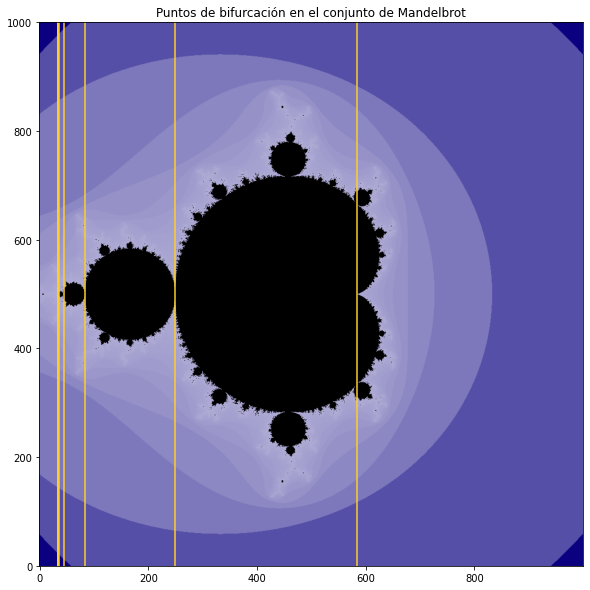

In [112]:
mandelbrot = MandelbrotSet()
mandelbrot.computeConvergenceGrid()
mandelbrot.plotMandelbrotSetWithBifurcationPoints(bifurcationPoints)